In [1]:
import pandas as pd
import yfinance as yf

In [2]:
tickers = ['MGM','CZR','WYNN','PENN','DKNG','BYD']

In [3]:
tickers

['MGM', 'CZR', 'WYNN', 'PENN', 'DKNG', 'BYD']

In [4]:
data = yf.download(tickers, start='2015-01-01', group_by='ticker')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  6 of 6 completed


In [5]:
data

Ticker           DKNG                                                PENN  \
Price            Open       High        Low      Close      Volume   Open   
Date                                                                        
2015-01-02        NaN        NaN        NaN        NaN         NaN  13.73   
2015-01-05        NaN        NaN        NaN        NaN         NaN  13.40   
2015-01-06        NaN        NaN        NaN        NaN         NaN  13.24   
2015-01-07        NaN        NaN        NaN        NaN         NaN  13.35   
2015-01-08        NaN        NaN        NaN        NaN         NaN  14.44   
...               ...        ...        ...        ...         ...    ...   
2025-04-02  33.185001  34.970001  32.770000  34.430000   9940500.0  15.98   
2025-04-03  32.075001  32.487000  31.170000  32.400002  15733100.0  16.26   
2025-04-04  30.700001  32.200001  29.639999  31.670000  18112600.0  15.00   
2025-04-07  30.520000  35.250000  30.360001  32.880001  18918800.0  14.01   
2025-04-08  34.200001  34.810001  31.274099  31.889999  13178226.0  14.75   

Ticker                                         ...        MGM             \
Price            High     Low  Close   Volume  ...       Open       High   
Date                                           ...                         
2015-01-02  13.960000  13.390  13.48   773700  ...  20.136965  20.297532   
2015-01-05  13.570000  13.070  13.19  2103900  ...  19.664713  19.778055   
2015-01-06  13.450000  12.880  13.21  1485500  ...  19.192459  19.258575   
2015-01-07  14.290000  13.250  14.23  2430200  ...  19.173561  19.362464   
2015-01-08  15.070000  14.410  14.52  2275800  ...  19.702488  19.844164   
...               ...     ...    ...      ...  ...        ...        ...   
2025-04-02  17.190001  15.930  17.17  3669800  ...  29.469999  30.940001   
2025-04-03  16.290001  15.330  15.45  5266600  ...  28.910000  29.139999   
2025-04-04  15.040000  13.250  14.29  8233500  ...  26.879999  27.580000   
2025-04-07  15.430000  13.480  14.06  6140500  ...  26.059999  28.170000   
2025-04-08  15.030000  13.295  13.75  5232673  ...  27.260000  27.754999   

Ticker                                            BYD                        \
Price             Low      Close    Volume       Open       High        Low   
Date                                                                          
2015-01-02  19.277461  19.853613  11628200  12.157742  12.176620  11.496995   
2015-01-05  19.201903  19.305799   9182100  11.732976  11.817929  11.459238   
2015-01-06  18.417961  18.569082  16832900  11.638583  11.742415  11.147743   
2015-01-07  18.975215  19.296349  12387000  11.629144  11.827368  11.534752   
2015-01-08  19.513585  19.570255  12807100  11.912323  12.506995  11.912323   
...               ...        ...       ...        ...        ...        ...   
2025-04-02  29.469999  30.750000   5133600  64.980003  68.000000  64.510002   
2025-04-03  27.500000  27.900000  13214400  64.529999  64.820000  63.009998   
2025-04-04  25.610001  26.860001  11275500  60.810001  62.680000  59.740002   
2025-04-07  25.530001  26.299999  11382900  59.730000  64.410004  58.939999   
2025-04-08  25.299999  25.790001   8912893  63.180000  64.160004  60.150002   

Ticker                          
Price           Close   Volume  
Date                            
2015-01-02  11.808490  1354500  
2015-01-05  11.657462   972900  
2015-01-06  11.478116  1480200  
2015-01-07  11.808490  1033500  
2015-01-08  12.119987  2842400  
...               ...      ...  
2025-04-02  67.580002   914100  
2025-04-03  63.360001   982500  
2025-04-04  61.770000  1415200  
2025-04-07  61.240002  2092600  
2025-04-08  60.799999  1279567  

[2582 rows x 30 columns]

In [6]:
data.shape

(2582, 30)

In [7]:
flat_df = data.stack(level=0).reset_index().rename(columns={'level_1':'Ticker'})

In [8]:
flat_df = flat_df[['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Volume']]

In [9]:
flat_df.head(5)

Price,Date,Ticker,Open,High,Low,Close,Volume
0,2015-01-02,BYD,12.157742,12.176620,11.496995,11.808490,1354500.0
1,2015-01-02,CZR,4.240000,4.240000,3.880000,4.040000,2200.0
2,2015-01-02,MGM,20.136965,20.297532,19.277461,19.853613,11628200.0
3,2015-01-02,PENN,13.730000,13.960000,13.390000,13.480000,773700.0
4,2015-01-02,WYNN,128.349131,128.901950,122.786383,126.880707,2228900.0


In [10]:
close_only = flat_df[['Date','Ticker','Close','Volume']]

In [11]:
close_only

Price,Date,Ticker,Close,Volume
0,2015-01-02,BYD,11.808490,1354500.0
1,2015-01-02,CZR,4.040000,2200.0
2,2015-01-02,MGM,19.853613,11628200.0
3,2015-01-02,PENN,13.480000,773700.0
4,2015-01-02,WYNN,126.880707,2228900.0
...,...,...,...,...
14340,2025-04-08,CZR,23.510000,7416743.0
14341,2025-04-08,DKNG,31.889999,13178226.0
14342,2025-04-08,MGM,25.790001,8912893.0
14343,2025-04-08,PENN,13.750000,5232673.0


In [12]:
close_only.shape

(14345, 4)

In [13]:
close_only.describe

<bound method NDFrame.describe of Price       Date Ticker       Close      Volume
0     2015-01-02    BYD   11.808490   1354500.0
1     2015-01-02    CZR    4.040000      2200.0
2     2015-01-02    MGM   19.853613  11628200.0
3     2015-01-02   PENN   13.480000    773700.0
4     2015-01-02   WYNN  126.880707   2228900.0
...          ...    ...         ...         ...
14340 2025-04-08    CZR   23.510000   7416743.0
14341 2025-04-08   DKNG   31.889999  13178226.0
14342 2025-04-08    MGM   25.790001   8912893.0
14343 2025-04-08   PENN   13.750000   5232673.0
14344 2025-04-08   WYNN   66.099998   4027048.0

[14345 rows x 4 columns]>

In [14]:
close_only.info

<bound method DataFrame.info of Price       Date Ticker       Close      Volume
0     2015-01-02    BYD   11.808490   1354500.0
1     2015-01-02    CZR    4.040000      2200.0
2     2015-01-02    MGM   19.853613  11628200.0
3     2015-01-02   PENN   13.480000    773700.0
4     2015-01-02   WYNN  126.880707   2228900.0
...          ...    ...         ...         ...
14340 2025-04-08    CZR   23.510000   7416743.0
14341 2025-04-08   DKNG   31.889999  13178226.0
14342 2025-04-08    MGM   25.790001   8912893.0
14343 2025-04-08   PENN   13.750000   5232673.0
14344 2025-04-08   WYNN   66.099998   4027048.0

[14345 rows x 4 columns]>

In [15]:
close_only.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14345 entries, 0 to 14344
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    14345 non-null  datetime64[ns]
 1   Ticker  14345 non-null  object        
 2   Close   14345 non-null  float64       
 3   Volume  14345 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 448.4+ KB


In [16]:
close_only.groupby('Ticker')['Close'].sum()

Ticker
BYD      99993.932394
CZR     106328.337977
DKNG     45281.212031
MGM      80140.817380
PENN     78920.880001
WYNN    257614.590069
Name: Close, dtype: float64

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

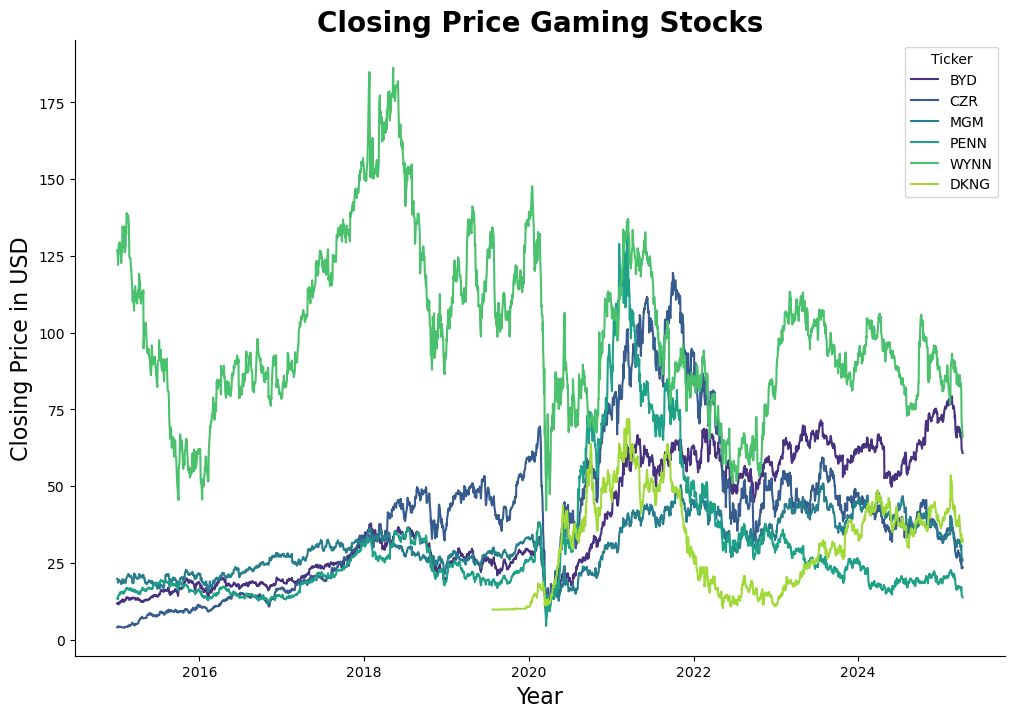

In [18]:
plt.figure(figsize=(12,8))
sns.lineplot(data=close_only,x='Date',y='Close',hue='Ticker',palette='viridis')
plt.title('Closing Price Gaming Stocks', fontweight ='bold',fontsize = 20)
plt.ylabel('Closing Price in USD', fontsize=16)
plt.xlabel('Year', fontsize=16)
sns.despine()

In [19]:
close_only.dtypes

Price
Date      datetime64[ns]
Ticker            object
Close            float64
Volume           float64
dtype: object

In [20]:
## rolling average
close_only = flat_df[['Date', 'Ticker', 'Close','Volume']].copy()
close_only['Rolling 30'] = close_only.groupby('Ticker')['Close'].transform(lambda x: x.rolling(window=30).mean())

In [21]:
close_only

Price,Date,Ticker,Close,Volume,Rolling 30
0,2015-01-02,BYD,11.808490,1354500.0,NaN
1,2015-01-02,CZR,4.040000,2200.0,NaN
2,2015-01-02,MGM,19.853613,11628200.0,NaN
3,2015-01-02,PENN,13.480000,773700.0,NaN
4,2015-01-02,WYNN,126.880707,2228900.0,NaN
...,...,...,...,...,...
14340,2025-04-08,CZR,23.510000,7416743.0,27.824667
14341,2025-04-08,DKNG,31.889999,13178226.0,37.880667
14342,2025-04-08,MGM,25.790001,8912893.0,31.321333
14343,2025-04-08,PENN,13.750000,5232673.0,17.423333


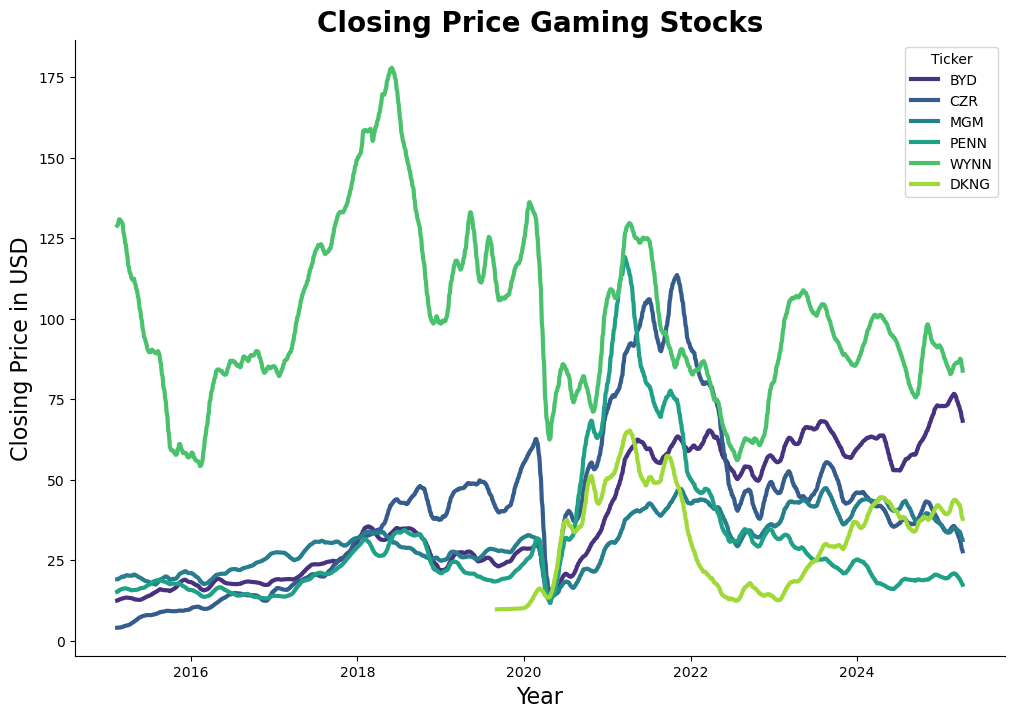

In [22]:
plt.figure(figsize=(12,8))
sns.lineplot(data=close_only,x='Date',y='Rolling 30',hue='Ticker',palette='viridis',linewidth=3)
plt.title('Closing Price Gaming Stocks', fontweight ='bold',fontsize = 20)
plt.ylabel('Closing Price in USD', fontsize=16)
plt.xlabel('Year', fontsize=16)
sns.despine()

In [23]:
close_only.columns

Index(['Date', 'Ticker', 'Close', 'Volume', 'Rolling 30'], dtype='object', name='Price')

In [24]:
close_only['Volume'].corr(close_only['Close'])
## negative correlation bewtween volumen and close price

-0.13791802137401746

In [25]:
## Average Prices per year
close_only['Year'] = close_only['Date'].dt.year

In [26]:
close_only.head(5)

Price,Date,Ticker,Close,Volume,Rolling 30,Year
0,2015-01-02,BYD,11.808490,1354500.0,NaN,2015
1,2015-01-02,CZR,4.040000,2200.0,NaN,2015
2,2015-01-02,MGM,19.853613,11628200.0,NaN,2015
3,2015-01-02,PENN,13.480000,773700.0,NaN,2015
4,2015-01-02,WYNN,126.880707,2228900.0,NaN,2015


In [27]:
## highest year was 2021
## Lets do this graphically
price_by_year = close_only.groupby('Year')['Close'].mean().sort_values(ascending=False)

In [28]:
price_by_year

Year
2021    72.409191
2018    54.565176
2023    50.437197
2024    48.714179
2025    46.785524
2022    45.141832
2019    44.590300
2017    42.821231
2020    42.669992
2016    29.739950
2015    29.663606
Name: Close, dtype: float64

C:\Users\cbreton\AppData\Local\Temp\ipykernel_16812\2221949235.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=price_by_year[:10],palette='magma')


Text(0, 0.5, 'Price in USD')

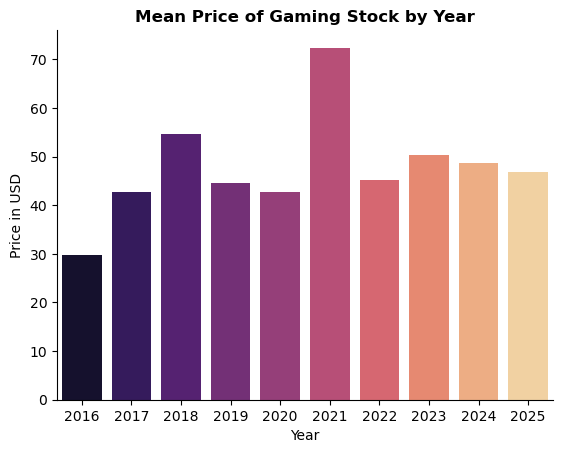

In [29]:
sns.barplot(data=price_by_year[:10],palette='magma')
plt.title('Mean Price of Gaming Stock by Year',fontweight = 'bold')
sns.despine()
plt.ylabel('Price in USD')

In [30]:
vol_by_year = close_only.groupby('Year')['Volume'].mean().sort_values(ascending=False)

In [31]:
vol_by_year

Year
2020    8.965016e+06
2022    6.574919e+06
2021    5.809711e+06
2025    5.080413e+06
2023    4.461722e+06
2024    4.358788e+06
2018    3.267685e+06
2015    3.047763e+06
2017    2.761408e+06
2016    2.597628e+06
2019    2.263062e+06
Name: Volume, dtype: float64

C:\Users\cbreton\AppData\Local\Temp\ipykernel_16812\3434924037.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vol_by_year[:10],palette='magma')


Text(0, 0.5, 'Number of Share')

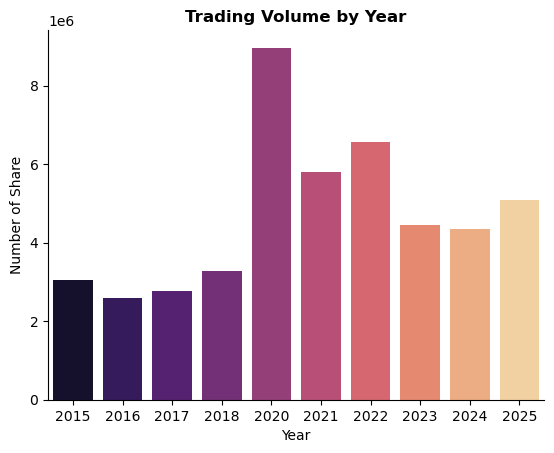

In [32]:
sns.barplot(data=vol_by_year[:10],palette='magma')
plt.title('Trading Volume by Year',fontweight = 'bold')
sns.despine()
plt.ylabel('Number of Share')

In [33]:
close_only.head(5)

Price,Date,Ticker,Close,Volume,Rolling 30,Year
0,2015-01-02,BYD,11.808490,1354500.0,NaN,2015
1,2015-01-02,CZR,4.040000,2200.0,NaN,2015
2,2015-01-02,MGM,19.853613,11628200.0,NaN,2015
3,2015-01-02,PENN,13.480000,773700.0,NaN,2015
4,2015-01-02,WYNN,126.880707,2228900.0,NaN,2015


In [34]:
flat_df.head(5)

Price,Date,Ticker,Open,High,Low,Close,Volume
0,2015-01-02,BYD,12.157742,12.176620,11.496995,11.808490,1354500.0
1,2015-01-02,CZR,4.240000,4.240000,3.880000,4.040000,2200.0
2,2015-01-02,MGM,20.136965,20.297532,19.277461,19.853613,11628200.0
3,2015-01-02,PENN,13.730000,13.960000,13.390000,13.480000,773700.0
4,2015-01-02,WYNN,128.349131,128.901950,122.786383,126.880707,2228900.0


In [35]:
flat_df['Year'] = flat_df['Date'].dt.year

In [36]:
flat_df['Month'] = flat_df['Date'].dt.month

In [37]:
flat_df['Day'] = flat_df['Date'].dt.day

In [38]:
flat_df.head(1)

Price,Date,Ticker,Open,High,Low,Close,Volume,Year,Month,Day
0,2015-01-02,BYD,12.157742,12.17662,11.496995,11.80849,1354500.0,2015,1,2


In [39]:
flat_df.shape

(14345, 10)

In [41]:
## Which companies will be included in this index
flat_df['Ticker'].unique()

array(['BYD', 'CZR', 'MGM', 'PENN', 'WYNN', 'DKNG'], dtype=object)

In [42]:
## From 2015 to today
flat_df['Date'].min(), flat_df['Date'].max()

(Timestamp('2015-01-02 00:00:00'), Timestamp('2025-04-08 00:00:00'))

## How are we going to weigh this out?

In [44]:
## indexed since 2015
base_date = '2015-01-02'

In [47]:
## Base Prices using earliest date available
base_prices = flat_df[flat_df['Date'] == base_date][['Ticker','Close']]

In [50]:
## Generating Base Price as a Column
flat_df= flat_df.merge(base_prices, on='Ticker', suffixes=('', '_base'))

In [51]:
flat_df.head(5)

Price,Date,Ticker,Open,High,Low,Close,Volume,Year,Month,Day,Close_base
0,2015-01-02,BYD,12.157742,12.176620,11.496995,11.808490,1354500.0,2015,1,2,11.80849
1,2015-01-05,BYD,11.732976,11.817929,11.459238,11.657462,972900.0,2015,1,5,11.80849
2,2015-01-06,BYD,11.638583,11.742415,11.147743,11.478116,1480200.0,2015,1,6,11.80849
3,2015-01-07,BYD,11.629144,11.827368,11.534752,11.808490,1033500.0,2015,1,7,11.80849
4,2015-01-08,BYD,11.912323,12.506995,11.912323,12.119987,2842400.0,2015,1,8,11.80849


In [53]:
## Need to get Market Cap for weighted average

In [55]:
market_cap_list = []

In [56]:
for ticker in tickers:
    try:
        info = yf.Ticker(ticker).info
        market_cap = info.get('marketCap')
        market_cap_list.append({'Ticker': ticker, 'MarketCap': market_cap})
    except Exception as e:
        print(f"Failed to fetch {ticker}: {e}")
        market_cap_list.append({'Ticker': ticker, 'MarketCap': None})

In [57]:
market_caps = pd.DataFrame(market_cap_list)

In [58]:
market_caps

,Ticker,MarketCap
0,MGM,7364360704
1,CZR,4984425472
2,WYNN,7017638400
3,PENN,2103021312
4,DKNG,15943596032
5,BYD,5016772096


In [61]:
## Merging with maket cap, right now its static
flat_df = flat_df.merge(market_caps, on= "Ticker", how='left')

In [62]:
flat_df

,Date,Ticker,Open,High,Low,Close,Volume,Year,Month,Day,Close_base,MarketCap_x,MarketCap_y
0,2015-01-02,BYD,12.157742,12.176620,11.496995,11.808490,1354500.0,2015,1,2,11.808490,5016772096,5016772096
1,2015-01-05,BYD,11.732976,11.817929,11.459238,11.657462,972900.0,2015,1,5,11.808490,5016772096,5016772096
2,2015-01-06,BYD,11.638583,11.742415,11.147743,11.478116,1480200.0,2015,1,6,11.808490,5016772096,5016772096
3,2015-01-07,BYD,11.629144,11.827368,11.534752,11.808490,1033500.0,2015,1,7,11.808490,5016772096,5016772096
4,2015-01-08,BYD,11.912323,12.506995,11.912323,12.119987,2842400.0,2015,1,8,11.808490,5016772096,5016772096
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12905,2025-04-02,WYNN,81.500000,83.320000,81.349998,81.540001,2539900.0,2025,4,2,126.880707,7017638400,7017638400
12906,2025-04-03,WYNN,78.500000,78.629997,72.500000,72.879997,5509100.0,2025,4,3,126.880707,7017638400,7017638400
12907,2025-04-04,WYNN,68.610001,71.269997,66.199997,70.089996,8307700.0,2025,4,4,126.880707,7017638400,7017638400
12908,2025-04-07,WYNN,67.980003,72.489998,66.599998,67.930000,4359300.0,2025,4,7,126.880707,7017638400,7017638400


In [65]:
flat_df = flat_df.drop('MarketCap_y',axis=1)

In [66]:
flat_df

,Date,Ticker,Open,High,Low,Close,Volume,Year,Month,Day,Close_base,MarketCap_x
0,2015-01-02,BYD,12.157742,12.176620,11.496995,11.808490,1354500.0,2015,1,2,11.808490,5016772096
1,2015-01-05,BYD,11.732976,11.817929,11.459238,11.657462,972900.0,2015,1,5,11.808490,5016772096
2,2015-01-06,BYD,11.638583,11.742415,11.147743,11.478116,1480200.0,2015,1,6,11.808490,5016772096
3,2015-01-07,BYD,11.629144,11.827368,11.534752,11.808490,1033500.0,2015,1,7,11.808490,5016772096
4,2015-01-08,BYD,11.912323,12.506995,11.912323,12.119987,2842400.0,2015,1,8,11.808490,5016772096
...,...,...,...,...,...,...,...,...,...,...,...,...
12905,2025-04-02,WYNN,81.500000,83.320000,81.349998,81.540001,2539900.0,2025,4,2,126.880707,7017638400
12906,2025-04-03,WYNN,78.500000,78.629997,72.500000,72.879997,5509100.0,2025,4,3,126.880707,7017638400
12907,2025-04-04,WYNN,68.610001,71.269997,66.199997,70.089996,8307700.0,2025,4,4,126.880707,7017638400
12908,2025-04-07,WYNN,67.980003,72.489998,66.599998,67.930000,4359300.0,2025,4,7,126.880707,7017638400


In [68]:
flat_df['Normalized'] = flat_df['Close'] / flat_df['Close_base'] * 100

In [69]:
flat_df.head(5)

,Date,Ticker,Open,High,Low,Close,Volume,Year,Month,Day,Close_base,MarketCap_x,Normalized
0,2015-01-02,BYD,12.157742,12.176620,11.496995,11.808490,1354500.0,2015,1,2,11.80849,5016772096,100.000000
1,2015-01-05,BYD,11.732976,11.817929,11.459238,11.657462,972900.0,2015,1,5,11.80849,5016772096,98.721025
2,2015-01-06,BYD,11.638583,11.742415,11.147743,11.478116,1480200.0,2015,1,6,11.80849,5016772096,97.202235
3,2015-01-07,BYD,11.629144,11.827368,11.534752,11.808490,1033500.0,2015,1,7,11.80849,5016772096,100.000000
4,2015-01-08,BYD,11.912323,12.506995,11.912323,12.119987,2842400.0,2015,1,8,11.80849,5016772096,102.637905


In [70]:
index = flat_df.groupby('Date')['Normalized'].mean().reset_index(name='IndexValue')

In [71]:
index

,Date,IndexValue
0,2015-01-02,100.000000
1,2015-01-05,99.461307
2,2015-01-06,97.134622
3,2015-01-07,101.594310
4,2015-01-08,102.620820
...,...,...
2577,2025-04-02,313.814060
2578,2025-04-03,287.502414
2579,2025-04-04,278.680124
2580,2025-04-07,279.358395


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

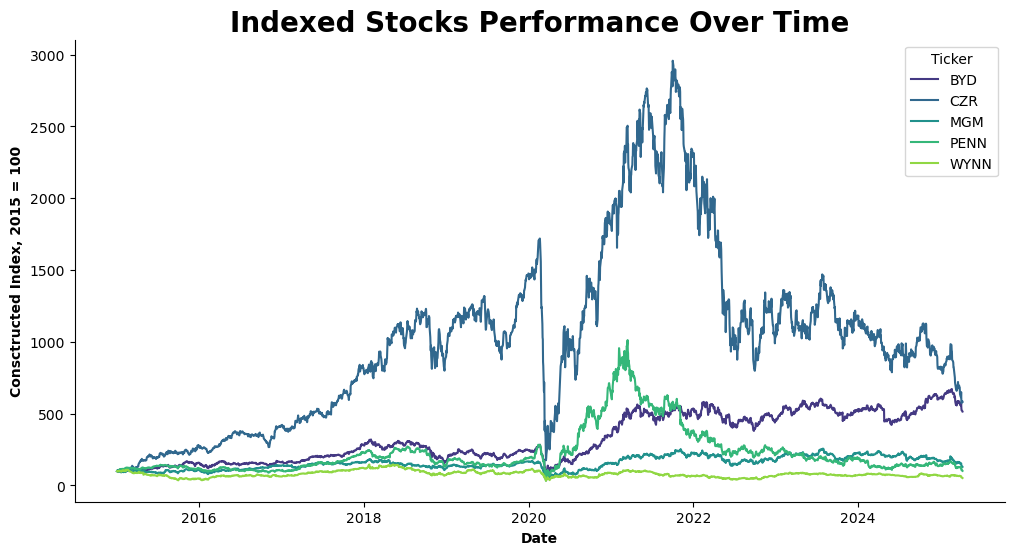

In [83]:
plt.figure(figsize=(12,6))
sns.lineplot(data= flat_df,x='Date',y='Normalized',hue='Ticker',palette='viridis')
plt.title('Indexed Stocks Performance Over Time', fontsize='20',fontweight='bold')
plt.xlabel('Date',fontweight ='bold')
plt.ylabel('Consctructed Index, 2015 = 100', fontweight='bold')
sns.despine()
plt.tight_layout

## Based on this I can say that CZRs was the stock that gathered more value in the 2022 year, it has consistently  outpaced the value since 2015. Some others such as PENN saw growth in 2021 but have not outperformed the stock price (adjsusted since 2015)

In [84]:
## Possible KPIs, how much has the stock grown in nominal value by Ticker?
flat_df.head(5)

,Date,Ticker,Open,High,Low,Close,Volume,Year,Month,Day,Close_base,MarketCap_x,Normalized
0,2015-01-02,BYD,12.157742,12.176620,11.496995,11.808490,1354500.0,2015,1,2,11.80849,5016772096,100.000000
1,2015-01-05,BYD,11.732976,11.817929,11.459238,11.657462,972900.0,2015,1,5,11.80849,5016772096,98.721025
2,2015-01-06,BYD,11.638583,11.742415,11.147743,11.478116,1480200.0,2015,1,6,11.80849,5016772096,97.202235
3,2015-01-07,BYD,11.629144,11.827368,11.534752,11.808490,1033500.0,2015,1,7,11.80849,5016772096,100.000000
4,2015-01-08,BYD,11.912323,12.506995,11.912323,12.119987,2842400.0,2015,1,8,11.80849,5016772096,102.637905


In [89]:
BYD = flat_df[flat_df['Ticker'] =='BYD']

In [90]:
BYD.head(5)

,Date,Ticker,Open,High,Low,Close,Volume,Year,Month,Day,Close_base,MarketCap_x,Normalized
0,2015-01-02,BYD,12.157742,12.176620,11.496995,11.808490,1354500.0,2015,1,2,11.80849,5016772096,100.000000
1,2015-01-05,BYD,11.732976,11.817929,11.459238,11.657462,972900.0,2015,1,5,11.80849,5016772096,98.721025
2,2015-01-06,BYD,11.638583,11.742415,11.147743,11.478116,1480200.0,2015,1,6,11.80849,5016772096,97.202235
3,2015-01-07,BYD,11.629144,11.827368,11.534752,11.808490,1033500.0,2015,1,7,11.80849,5016772096,100.000000
4,2015-01-08,BYD,11.912323,12.506995,11.912323,12.119987,2842400.0,2015,1,8,11.80849,5016772096,102.637905


In [105]:
flat_df['Ticker'].unique()

array(['BYD', 'CZR', 'MGM', 'PENN', 'WYNN'], dtype=object)

In [97]:
## Nominal Growth of BYD
BYD_start = BYD['Date'].min()
BYD_end = BYD['Date'].max()

In [100]:
BYD_min = BYD.loc[BYD['Date'] == BYD_start, 'Close'].values[0]
BYD_max = BYD.loc[BYD['Date']== BYD_end,'Close'].values[0]

In [101]:
BYD_min, BYD_max

(11.808489799499512, 60.79999923706055)

In [104]:
BYD_Growth_Nominal = BYD_max-BYD_min
print(f'The Nominal growth in USD was ${BYD_Growth_Nominal:,.2f}')

The Nominal growth in USD was $48.99


In [110]:
## PErcent Growth
BYD_Growth_Percent = (BYD_max-BYD_min)/BYD_min
BYD_Growth_Percent*100

414.88378505130675

In [107]:
## Nominal Growth of BYD
CZR = flat_df[flat_df['Ticker'] =='CZR']

In [111]:
CZR_start = CZR['Date'].min()
CZR_end = CZR['Date'].max()

In [112]:
CZR_min = CZR.loc[CZR['Date'] == CZR_start, 'Close'].values[0]
CZR_max = CZR.loc[CZR['Date']== CZR_end,'Close'].values[0]

In [113]:
CZR_min,CZR_max

(4.039999961853027, 23.510000228881836)

In [114]:
CZR_Growth_Nominal = CZR_max-CZR_min
print(f'The Nominal growth in USD was ${CZR_Growth_Nominal:,.2f}')

The Nominal growth in USD was $19.47


In [116]:
## Percent Growth
CZR_Growth_Percent = (CZR_max-BYD_min)/CZR_min
CZR_Growth_Percent*100

289.641349996825

In [119]:
growth_list = []

for ticker in tickers:
    df_t = flat_df[flat_df['Ticker'] == ticker].sort_values('Date')
    
    if len(df_t) < 2:
        continue  # skip if there's not enough data
    
    start_price = df_t.iloc[0]['Close']
    end_price = df_t.iloc[-1]['Close']
    
    nominal_growth = end_price - start_price
    percent_growth = (end_price / start_price - 1) * 100
    
    growth_list.append({
        'Ticker': ticker,
        'StartDate': df_t.iloc[0]['Date'],
        'EndDate': df_t.iloc[-1]['Date'],
        'StartPrice': start_price,
        'EndPrice': end_price,
        'NominalGrowth': nominal_growth,
        'PercentGrowth': percent_growth
    })

growth_df = pd.DataFrame(growth_list)

In [120]:
## Dataset with percent and nominal Growth
growth_df

,Ticker,StartDate,EndDate,StartPrice,EndPrice,NominalGrowth,PercentGrowth
0,MGM,2015-01-02,2025-04-08,19.853613,25.790001,5.936388,29.900795
1,CZR,2015-01-02,2025-04-08,4.040000,23.510000,19.470000,481.930704
2,WYNN,2015-01-02,2025-04-08,126.880707,66.099998,-60.780708,-47.903822
3,PENN,2015-01-02,2025-04-08,13.480000,13.750000,0.270000,2.002971
4,BYD,2015-01-02,2025-04-08,11.808490,60.799999,48.991509,414.883785


In [121]:
growth_df['PercentGrowth'].sort_values(ascending=False)

1    481.930704
4    414.883785
0     29.900795
3      2.002971
2    -47.903822
Name: PercentGrowth, dtype: float64

In [127]:
growth_df_sorted = growth_df.sort_values('PercentGrowth', ascending=False)

In [128]:
## Top Percent Growth
growth_df_sorted[['Ticker', 'PercentGrowth']].head()

,Ticker,PercentGrowth
1,CZR,481.930704
4,BYD,414.883785
0,MGM,29.900795
3,PENN,2.002971
2,WYNN,-47.903822


In [129]:
growth_df_sorted_percent = growth_df.sort_values('NominalGrowth', ascending=False)

In [130]:
## Top by Nominal Growth
growth_df_sorted_percent[['Ticker', 'NominalGrowth']].head()

,Ticker,NominalGrowth
4,BYD,48.991509
1,CZR,19.470000
0,MGM,5.936388
3,PENN,0.270000
2,WYNN,-60.780708


## WYNN has not done too well since 2015 to today. On the other hand, Caesars and Boyd have done consdierably better.

## MGM is the middle of the pack, the indexed analysis above suggests that Caesars experienced growth over the 2021, 2022 period, more than any other Gaming Company

In [ ]:
## Futher Exploration Incoming